# Zadanie

Z populacji, w której badana cecha ma rozkład $N(\mu,4)$ wylosowano próbkę złożoną z $9$ obserwacji. Na poziomie istotności $\alpha=0.05$ zweryfikować hipotezę 

<ul>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu <2$ </li>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu > 2$ </li>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu \neq 2$ </li>
</ul>

jeżeli średnia z punktów wynosi $\bar X = 1.4$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

## Model 1.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b> znanym $\sigma$}</b>.

Weryfikujemy hipotezę:

$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 > \mu_0
$$


W tym teście używa się statystyki
$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$
Zbiór krytyczny jest dany za pomocą przedziału
$$
[u(1-\alpha), +\infty)
$$
gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.


## Model 2.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>znanym $\sigma$</b>.

Weryfikujemy hipotezę:


$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 < \mu_0
$$

W tym teście używa się statystyki
$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$
Zbiór krytyczny jest dany za pomocą przedziału
$$
(-\infty,-u(\alpha)]
$$
gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.

## Model 3

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>znanym $\sigma$</b>.

Weryfikujemy hipotezę:

$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 \neq \mu_0
$$

W tym teście używa się statystyki

$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
\big(-\infty,-u(1-\frac{1}{2}\alpha)\big] \cup \big[u(1-\frac{1}{2}\alpha), +\infty \big)
$$

gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.


## Zdefiniujmy zmienną losową

In [2]:
n=9
(mu, sigma)=(0,1)
X=stats.norm(mu, sigma)

## Wyliczmy wartość statystyki

$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$

In [3]:
alpha=0.05
bar_x = 1.4
mu=2
s = 4
u= (bar_x - mu)/s*np.sqrt(n)
print(mu)
print(bar_x)
print(s)
print(u)

2
1.4
4
-0.45000000000000007


# $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu <2$

## Wypisz przedział krytyczny

In [4]:
L=-np.infty

In [5]:
R=-X.ppf(1-alpha)

In [6]:
print(r'( %3.2f , %3.2f)' % (L,R))

( -inf , -1.64)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [7]:
if u < R:
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0


## wylicz p-value

In [8]:
p = X.cdf(u)
print(p)

0.32635522028791997


## zweryfikuj hipotezę na podstawie wartości p-value

In [9]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

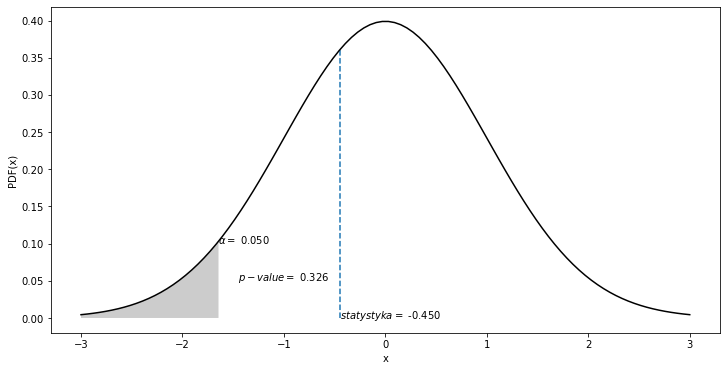

In [10]:
u_1=X.ppf(alpha)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)
figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.text(u_1, 0.1, r'$\alpha = $ %.3f' % np.round(alpha,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.text(u, 0, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(u-1.0, 0.05, r'$p-value = $ %.3f' % np.round(p,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

0.67364477971208


0.32635522028791997


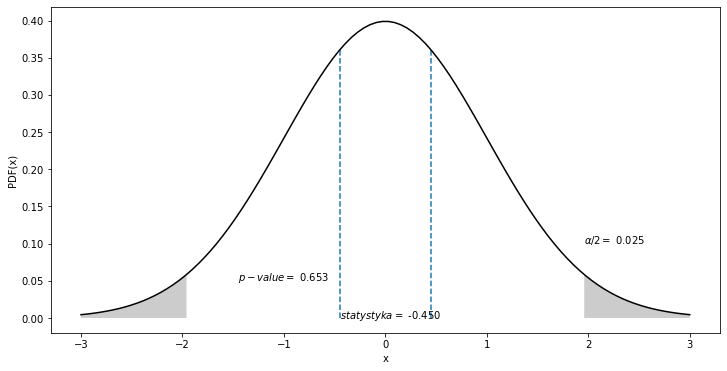

In [26]:
p = X.cdf(u)
print(p)

u_1=X.ppf(1-alpha/2)
u_2=X.ppf(alpha/2)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1, 3)
y1 = X.pdf(x1)
x11 = np.linspace(-3, u_2)
y11 = X.pdf(x11)
figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
axs.fill_between(x11, y11, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.text(u_1, 0.1, r'$\alpha/2 = $ %.3f' % np.round(alpha/2,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.vlines(-u, 0, X.pdf(-u), linestyles='--')
axs.text(u, 0, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(u-1.0, 0.05, r'$p-value = $ %.3f' % np.round(2*p,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

0.67364477971208


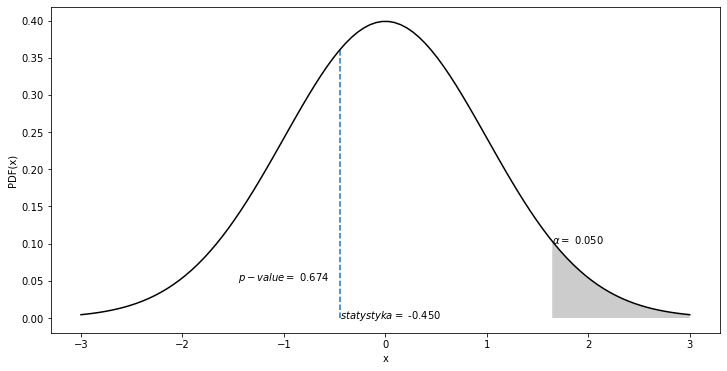

In [15]:
p = 1-X.cdf(u)
print(p)

u_1=X.ppf(1-alpha)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1, 3)
y1 = X.pdf(x1)
figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.text(u_1, 0.1, r'$\alpha = $ %.3f' % np.round(alpha,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.text(u, 0, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(u-1.0, 0.05, r'$p-value = $ %.3f' % np.round(p,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

# $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu > 2$
## Wypisz przedział krytyczny

In [129]:
L=X.ppf(1-alpha)

In [130]:
R=np.inf

In [131]:
print(r'( %3.2f , %3.2f)' % (L,R))

( 1.64 , inf)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [132]:
if u > L:
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0


## wylicz p-value

In [133]:
p = X.sf(u)
print(p)

0.673644779712


## zweryfikuj hipotezę na podstawie wartości p-value

In [134]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

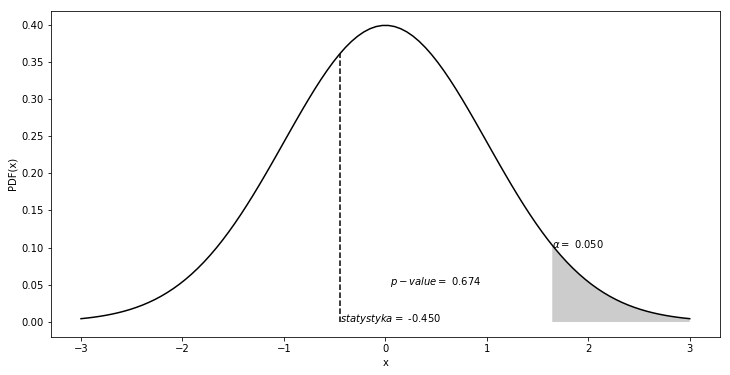

In [135]:
u_1=X.isf(alpha)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1,3)
y1 = X.pdf(x1)


figs, axs = plt.subplots(1,1, figsize=(12, 6))

axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.text(u_1, 0.1, r'$\alpha = $ %.3f' % np.round(alpha,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.text(u, 0, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(u+0.5, 0.05, r'$p-value = $ %.3f' % np.round(p,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')

plt.show()

# $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu \neq 2$
## Wypisz przedział krytyczny

In [55]:
L1=-np.inf

In [56]:
L2=-X.ppf(1-alpha/2)

In [57]:
R1=X.ppf(1-alpha/2)

In [58]:
R2=np.inf

In [59]:
print(r'( %3.2f , %3.2f) sum ( %3.2f , %3.2f)' % (L1,L2,R1,R2))

( -inf , -1.96) sum ( 1.96 , inf)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [88]:
if (u <L2) | (u > R1):
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0


## wylicz p-value

In [116]:
p = X.sf(-u)+X.cdf(u)
print(p)

0.652710440576


## zweryfikuj hipotezę na podstawie wartości p-value

In [118]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

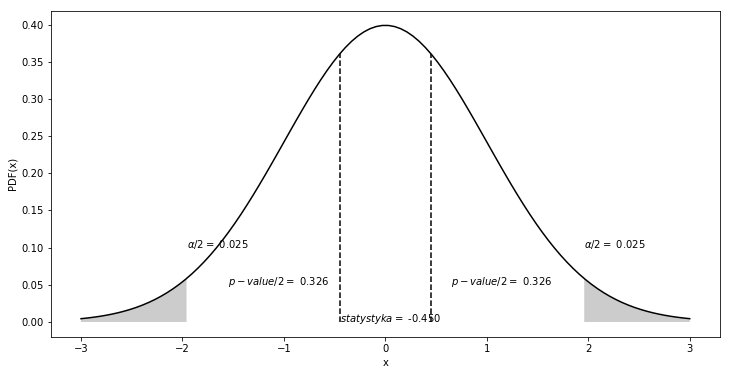

In [114]:
u_1=X.isf(alpha/2)
u_2=X.ppf(alpha/2)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1,3)
y1 = X.pdf(x1)

x2 = np.linspace(-3,u_2)
y2 = X.pdf(x2)


figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
axs.fill_between(x2, y2, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.text(u_1, 0.1, r'$\alpha/2 = $ %.3f' % np.round(alpha/2,3))
axs.text(u_2, 0.1, r'$\alpha/2 = $ %.3f' % np.round(alpha/2,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.vlines(-u, 0, X.pdf(-u), linestyles='--')
axs.text(u, 0, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(u-1.1, 0.05, r'$p-value/2 = $ %.3f' % np.round(p/2,3))
axs.text(u+1.1, 0.05, r'$p-value/2 = $ %.3f' % np.round(p/2,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()